In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Car_Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [27]:
df.shape

(398, 9)

In [28]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'Car_Name'],
      dtype='object')

In [29]:
#lets drop the Car_Name as it shows no importance
df.drop(['Car_Name'],axis=1,inplace=True)

In [30]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [31]:
#Lets check the data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [32]:
#Lets check the null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

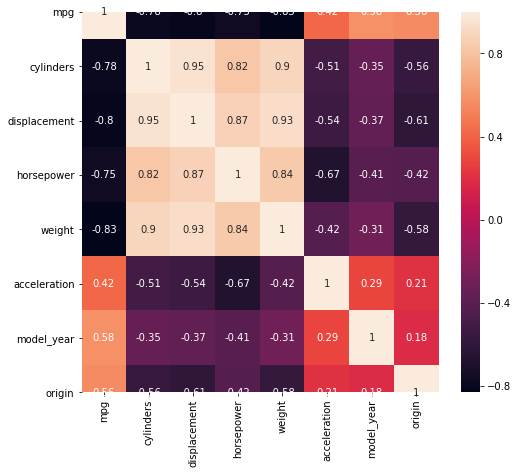

In [33]:
#lets check the correlation of the columns by heatmap
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#after checking we can see that 1 value is completely diagonal 
#so the heatmap shows columns are completely correlated with each other.

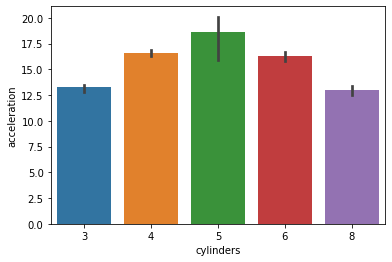

In [36]:
#Lets check the cylinders with respect to acceleration relation 
sns.barplot(x='cylinders',y='acceleration',data=df)
plt.show()

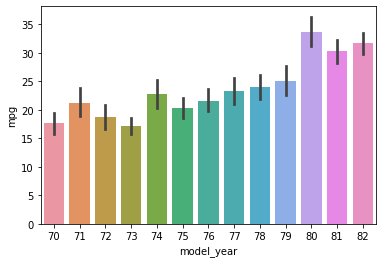

In [35]:
#Lets check the mpg with model_year to cylinder relation 
sns.barplot(x='model_year',y='mpg',data=df)
plt.show()

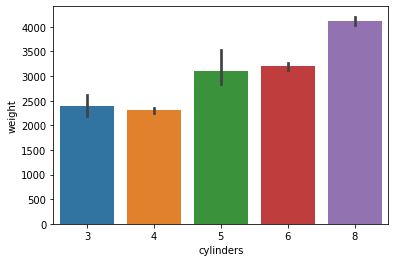

In [39]:
#Lets check the mpg with model_year to cylinder relation 
sns.barplot(x='cylinders',y='weight',data=df)
plt.show()

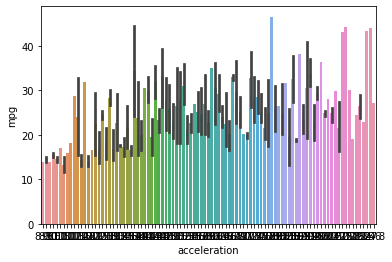

In [42]:
#Lets check the acceleration with mpg relation 
sns.barplot(x='acceleration',y='mpg',data=df)
plt.show()

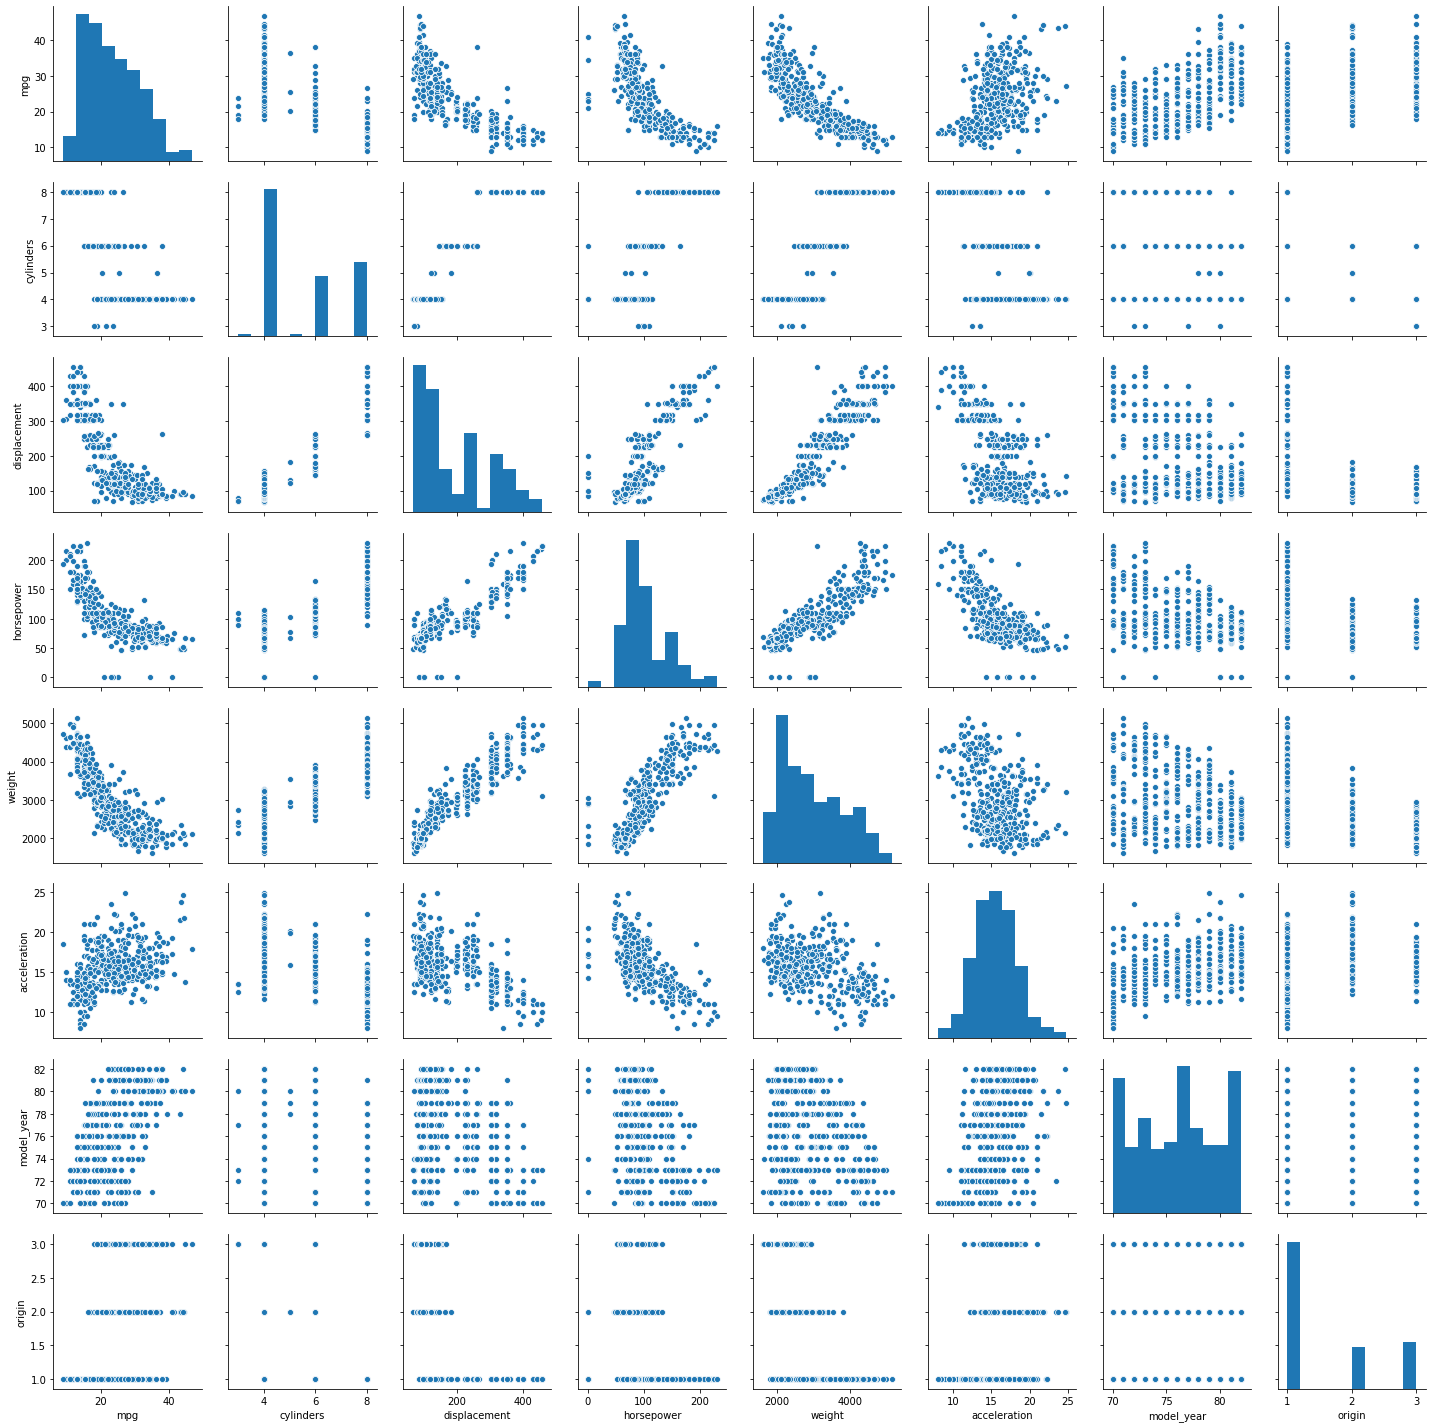

In [43]:
#lets check the regression parameters by pairplot
sns.pairplot(df)
plt.show()
#as per the plots and diagram shown in a graphical representation we can see this is a clear problem of linear regression
#so we will go ahead for the prediction with linear regression model 

In [44]:
#lets check the skewness of the data
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      0.787889
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.923776
dtype: float64

In [45]:
#change the values in each columns by replacing log1 values
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [46]:
#lets check the skewness of the data
df.skew()
#here we can see that after checking out the skewness still some values are more so will scaled all the values at one node 
#by standard scaling

mpg             0.457066
cylinders       0.526922
displacement    0.228886
horsepower     -4.891455
weight          0.531063
acceleration    0.278777
model_year      0.011535
origin          0.796540
dtype: float64

In [47]:
#now we will check for the Outliers and remove it for a better results
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final = df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(398, 8)
(390, 8)


In [48]:
#lets separate x and y
df_x = df_final.drop(columns=["mpg"],axis=1)
y = df_final[["mpg"]]

In [49]:
#lets do Standar Scaling to scaled a data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [50]:
#lets split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [51]:
print(x_train.shape,x_test.shape)

(273, 7) (117, 7)


In [52]:
print(y_train.shape,y_test.shape)

(273, 1) (117, 1)


In [53]:
#lets create a function to call 

def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr > max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max r2 corrosponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [54]:
#lets apply first algorithm
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.8153679628085722
r2 score corresponding to 43 is 0.8588257169423843
r2 score corresponding to 44 is 0.854777292904312
r2 score corresponding to 45 is 0.8663169212033013
r2 score corresponding to 46 is 0.8478113384618806
r2 score corresponding to 47 is 0.817502926502487
r2 score corresponding to 48 is 0.8036292612997877
r2 score corresponding to 49 is 0.7956427376123221
r2 score corresponding to 50 is 0.8558060351486563
r2 score corresponding to 51 is 0.7859587698041219
r2 score corresponding to 52 is 0.8544037813591985
r2 score corresponding to 53 is 0.8383961496383566
r2 score corresponding to 54 is 0.8271988295040753
r2 score corresponding to 55 is 0.8193639587448658
r2 score corresponding to 56 is 0.8196443284313311
r2 score corresponding to 57 is 0.7841942039186667
r2 score corresponding to 58 is 0.8190048362223911
r2 score corresponding to 59 is 0.8677375439820872
r2 score corresponding to 60 is 0.8397913403409183
r2 score corresponding to 61 is 0

In [55]:
#Here it shows a nice max r score lets explore more and check 

In [56]:
#lets go for the next model and find out the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors , cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [57]:
#lets apply and get the r2 score
knr = KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.86799906388045
r2 score corresponding to 43 is 0.8383922159469546
r2 score corresponding to 44 is 0.8772260406839333
r2 score corresponding to 45 is 0.8995916823814516
r2 score corresponding to 46 is 0.9036156368064373
r2 score corresponding to 47 is 0.8392501717208545
r2 score corresponding to 48 is 0.8133382287772131
r2 score corresponding to 49 is 0.8453256368353809
r2 score corresponding to 50 is 0.9134230551411948
r2 score corresponding to 51 is 0.7843272404766157
r2 score corresponding to 52 is 0.8671663978363978
r2 score corresponding to 53 is 0.881511055583837
r2 score corresponding to 54 is 0.8077920119055867
r2 score corresponding to 55 is 0.8752383774632858
r2 score corresponding to 56 is 0.8327153919187464
r2 score corresponding to 57 is 0.8595302528143673
r2 score corresponding to 58 is 0.8567156775355808
r2 score corresponding to 59 is 0.910090477706625
r2 score corresponding to 60 is 0.8291647504943686
r2 score corresponding to 61 is 0.8

In [58]:
#lets check mean r2 score of both of linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print("mean r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of linear regression is ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("mean r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("mean standard deviation in r2 score of knn regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

mean r2 score of linear regression is  0.6014678335594027
mean standard deviation in r2 score of linear regression is  0.2217189133226295

mean r2 score of knn regression is  0.7016061481656235
mean standard deviation in r2 score of knn regression is  0.209928288286151


In [60]:
#Here we can see the best performance is given by knn
#lets go ahead and save it 

In [61]:

from sklearn.externals import joblib

In [62]:
joblib.dump(knr, 'mpg_Model.pkl')

['mpg_Model.pkl']